In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
df_item_cate_lodgment = pd.read_csv("./csv/관광_숙박여행_시_구매한_여행사_상품_유형__중복응답.csv")
df_reservation_cate_lodgment = pd.read_csv("./csv/관광_숙박여행_사전예약_유형__중복응답.csv")

In [4]:
df_reservation_cate_lodgment.loc[(df_reservation_cate_lodgment.query("항목 == '체험 프로그램(농어촌 체험 생태체험 학습 등)'").index),'항목'] = '체험 프로그램'
df_reservation_cate_lodgment.loc[(df_reservation_cate_lodgment.query("항목 == '관광명소(유적지 국립공원 등)'").index),'항목'] = '관광명소'
df_reservation_cate_lodgment.loc[(df_reservation_cate_lodgment.query("항목 == '교통수단(항공 선박 철도 버스 등)'").index),'항목'] = '교통수단'
df_reservation_cate_lodgment.loc[(df_reservation_cate_lodgment.query("항목 == '레저시설(놀이시설 스파 스키장 골프장 등)'").index),'항목'] = '레저시설'
df_reservation_cate_lodgment.loc[(df_reservation_cate_lodgment.query("항목 == '숙박시설(호텔 콘도미니엄/ 리조트 펜션 유스호스텔 등)'").index),'항목'] = '숙박시설'
df_item_cate_lodgment.loc[(df_item_cate_lodgment.query("항목 == '교통(항공 선박 철도 버스 등)'").index),'항목'] = '교통'

## 관광_숙박여행_시_구매한_여행사_상품_유형__중복응답

In [5]:
df_item_cate_lodgment

,시점,통계분류(1),통계분류(2),항목,데이터
0,2018,전체,소계,숙박시설,75.8
1,2018,전체,소계,교통,41.9
2,2018,전체,소계,차량대여/렌트,37.9
3,2018,전체,소계,레저시설,16.6
4,2018,전체,소계,기타,0.7
...,...,...,...,...,...
182,2022,연령,60대,숙박시설,61.4
183,2022,연령,60대,교통,62.7
184,2022,연령,60대,차량대여/렌트,40.6
185,2022,연령,60대,레저시설,10.8


In [6]:
item_cate = df_item_cate_lodgment.query("`통계분류(1)` == '연령'")
age_3040 = item_cate.groupby(['항목', '통계분류(2)'])
result = age_3040['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
교통,59.55,33.8,36.00,25.0,48.9,49.3,75.1
기타,NaN,NaN,2.65,NaN,NaN,NaN,NaN
레저시설,17.60,11.0,11.45,10.4,7.8,10.8,6.2
숙박시설,100.00,94.7,82.30,91.6,94.2,83.2,78.3
차량대여/렌트,55.30,21.5,13.80,22.7,23.5,39.4,63.9


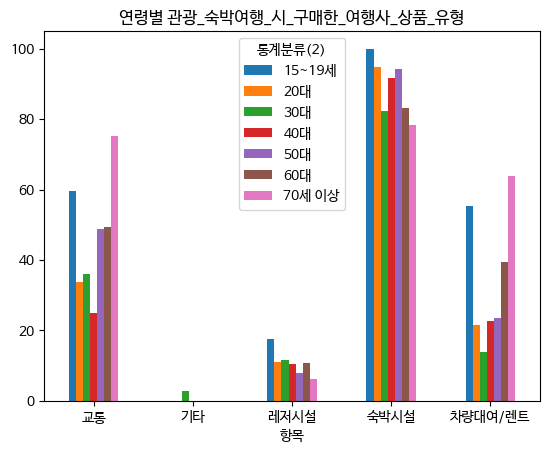

In [7]:
result.plot(kind='bar')
plt.title("연령별 관광_숙박여행_시_구매한_여행사_상품_유형")
plt.xticks(rotation=0)
plt.show()

- 숙박여행
- 숙박시설 구매가 50대 -> 15~19세가 가장 많음으로 바뀜
- 차량대여/렌트가 어떻게 15~19세..?

In [8]:
item_cate = df_item_cate_lodgment.query("`통계분류(1)` == '성별'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
교통,41.5,33.3
기타,NaN,1.2
레저시설,8.9,9.9
숙박시설,85.8,89.9
차량대여/렌트,23.5,24.7


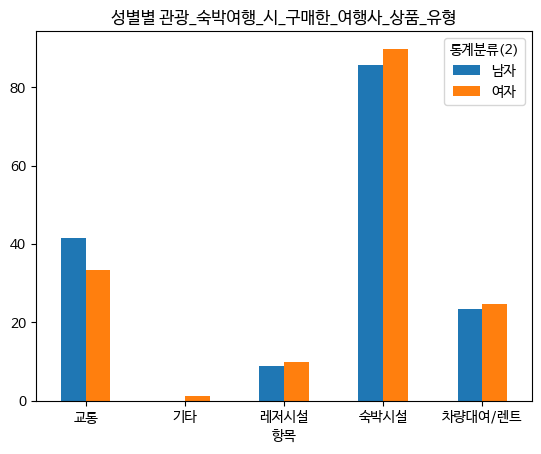

In [9]:
result.plot(kind='bar')
plt.title("성별별 관광_숙박여행_시_구매한_여행사_상품_유형")
plt.xticks(rotation=0)
plt.show()

In [10]:
grouped = df_item_cate_lodgment.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,교통,기타,레저시설,숙박시설,차량대여/렌트
시점,,,,,
2018,493.5,4.9,160.3,738.2,303.0
2019,483.6,4.0,99.8,838.1,296.7
2020,446.7,NaN,128.7,808.2,218.0
2021,390.1,NaN,43.0,988.2,267.5
2022,335.9,NaN,43.5,930.3,197.9


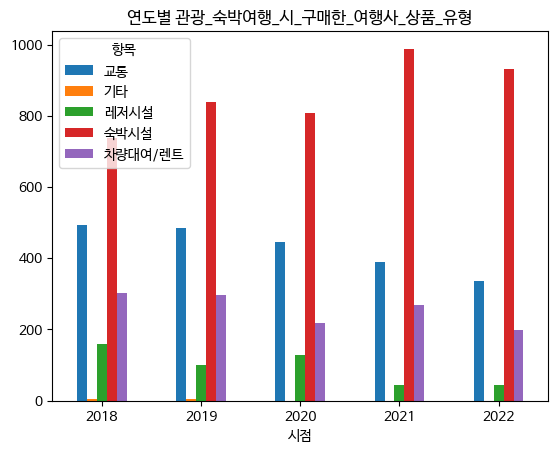

In [11]:
result.plot(kind='bar')
plt.title("연도별 관광_숙박여행_시_구매한_여행사_상품_유형")
plt.xticks(rotation=0)
plt.show()

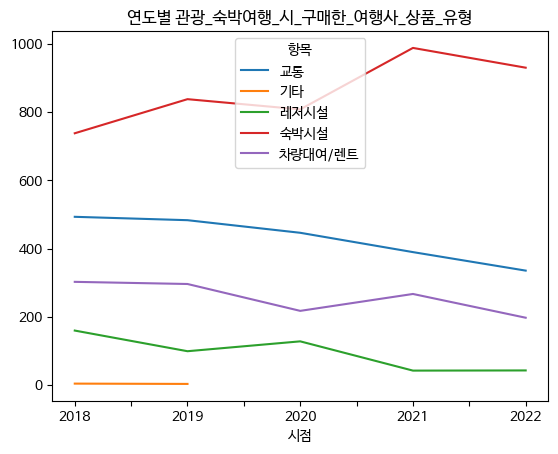

In [12]:
df_item_cate_lodgment['시점'] = df_item_cate_lodgment['시점'].astype(str)
grouped = df_item_cate_lodgment.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result.plot(kind='line')
plt.title("연도별 관광_숙박여행_시_구매한_여행사_상품_유형")
plt.show()

- 교통 구매량이 시간이 지날수록 줄어듬

## 관광_숙박여행_사전예약_유형__중복응답

In [13]:
df_reservation_cate_lodgment

,시점,통계분류(1),통계분류(2),항목,데이터
0,2018,성별,남자,숙박시설,93.4
1,2018,성별,남자,교통수단,21.0
2,2018,성별,남자,차량대여/렌트,18.2
3,2018,성별,남자,레저시설,5.8
4,2018,성별,남자,식당,4.1
...,...,...,...,...,...
361,2022,연령,70세 이상,교통수단,13.5
362,2022,연령,70세 이상,차량대여/렌트,4.5
363,2022,연령,70세 이상,식당,0.7
364,2022,연령,70세 이상,관광명소,0.3


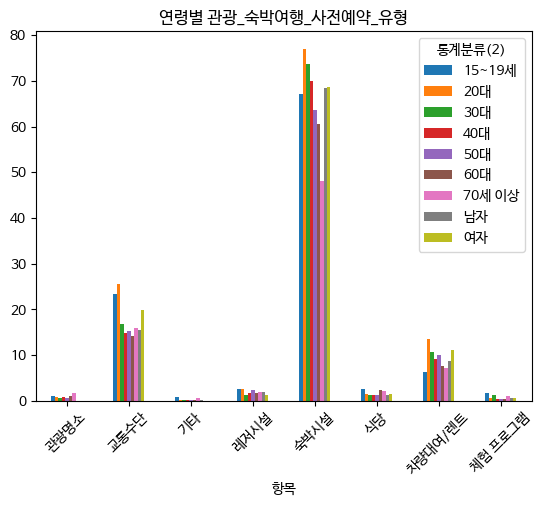

In [14]:
item_cate = df_reservation_cate_lodgment.query("`통계분류(1)` == '연령' and 항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()

result.plot(kind='bar')
plt.title("연령별 관광_숙박여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

In [15]:
item_cate = df_reservation_cate_lodgment.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
관광명소,1.10,0.9,0.70,0.9,0.7,1.1,1.75
교통수단,23.30,25.5,16.90,14.9,15.2,14.3,16.00
기타,0.90,0.2,0.25,0.1,0.1,0.1,0.55
레저시설,2.50,2.5,1.40,1.8,2.3,1.8,2.00
사전 예약하지 않았음,28.60,20.2,26.50,34.3,34.9,40.1,53.50
숙박시설,67.20,77.0,73.60,69.9,63.6,60.5,48.00
식당,2.50,1.6,1.20,1.3,1.4,2.4,2.10
차량대여/렌트,6.40,13.5,10.60,9.2,10.1,7.6,7.10
체험 프로그램,1.75,0.6,1.40,0.4,0.4,0.5,1.00


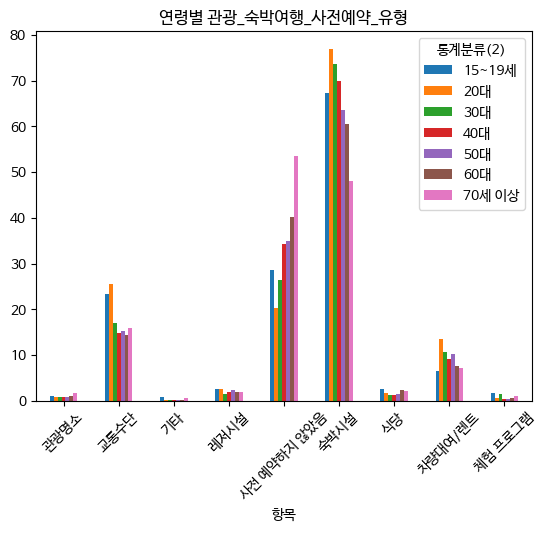

In [16]:
result.plot(kind='bar')
plt.title("연령별 관광_숙박여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

- 당연하지만.. 숙박시설 사전예약이 가장 많다.

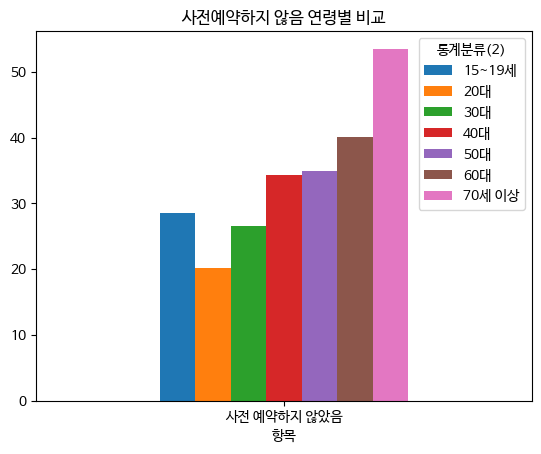

In [17]:
no_reservation = df_reservation_cate_lodgment.query("항목 == '사전 예약하지 않았음' and `통계분류(1)` == '연령'")

grouped = no_reservation.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result.plot(kind='bar')
plt.title("사전예약하지 않음 연령별 비교")
plt.xticks(rotation=0)
plt.show()

In [18]:
item_cate = df_reservation_cate_lodgment.query("`통계분류(1)` == '성별'")
item_cate = item_cate.query("항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")

grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
관광명소,1.00,0.6
교통수단,15.60,19.9
기타,0.25,0.0
레저시설,1.90,1.3
숙박시설,68.50,68.7
식당,1.20,1.5
차량대여/렌트,8.80,11.1
체험 프로그램,0.60,0.7


<Figure size 1800x600 with 0 Axes>

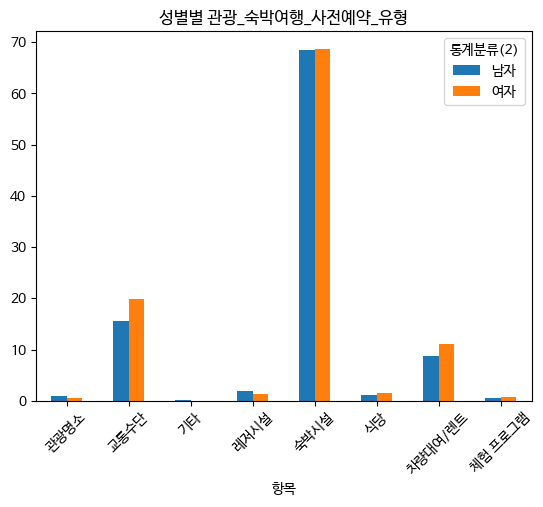

In [19]:
plt.figure(figsize=(18,6)) 
result.plot(kind='bar')
plt.title("성별별 관광_숙박여행_사전예약_유형")
plt.xticks(rotation=45)
plt.show()

In [20]:
grouped = df_reservation_cate_lodgment.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,관광명소,교통수단,기타,레저시설,사전 예약하지 않았음,숙박시설,식당,차량대여/렌트,체험 프로그램
시점,,,,,,,,,
2018,31.0,219.2,2.8,48.5,NaN,838.1,35.7,170.3,17.2
2019,21.1,188.2,4.1,41.7,NaN,828.5,29.8,73.9,14.2
2020,4.4,137.4,0.2,14.1,354.3,502.9,11.2,72.8,3.6
2021,7.4,160.5,0.1,12.2,299.7,559.1,8.6,84.9,5.5
2022,4.1,151.2,1.3,12.2,272.6,597.0,11.4,84.3,3.1


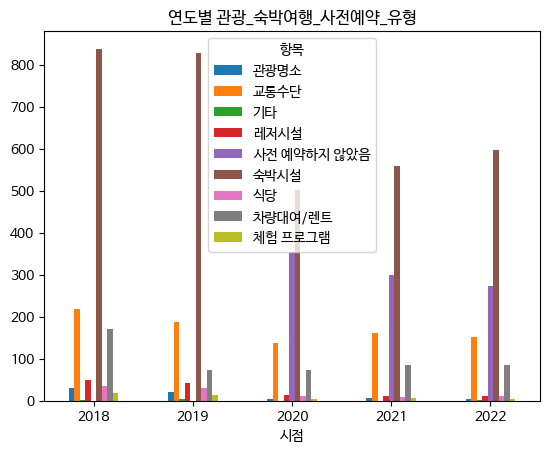

In [21]:
result.plot(kind='bar')
plt.title("연도별 관광_숙박여행_사전예약_유형")
plt.xticks(rotation=0)
plt.show()

- 2020년부터 점점 숙박시설의 예약이 증가하고있음

In [22]:
df_reservation_cate_lodgment['시점'] = df_reservation_cate_lodgment['시점'].astype(str)
year = df_reservation_cate_lodgment.query("시점 == '2020' or 시점 == '2021' or 시점 == '2022'")
no_reservation = year.query("항목 == '관광명소' or 항목 == '교통수단' or 항목 == '기타' or 항목 == '레저시설' or 항목 == '식당' or 항목 == '차량대여/렌트' or 항목 == '체험 프로그램' or 항목 == '숙박시설'")
grouped = no_reservation.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,관광명소,교통수단,기타,레저시설,숙박시설,식당,차량대여/렌트,체험 프로그램
시점,,,,,,,,
2020,4.4,137.4,0.2,14.1,502.9,11.2,72.8,3.6
2021,7.4,160.5,0.1,12.2,559.1,8.6,84.9,5.5
2022,4.1,151.2,1.3,12.2,597.0,11.4,84.3,3.1


Text(0.5, 1.0, '연도별 관광_숙박여행_사전예약_유형')

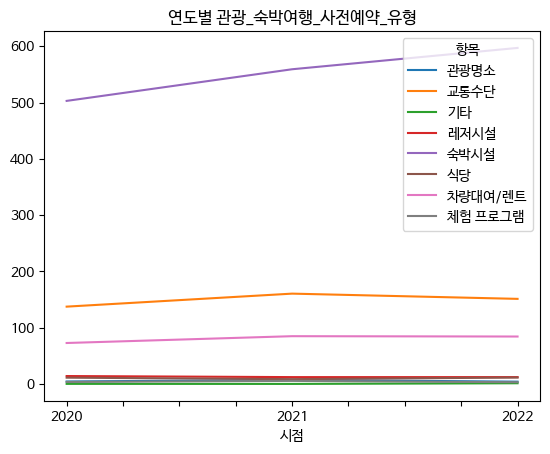

In [23]:
result.plot(kind='line')
plt.title("연도별 관광_숙박여행_사전예약_유형")

## 월별 카페 검색량 변화

In [24]:
df_datalab_cafe = pd.read_csv("./csv/datalab_cafe.csv")

In [25]:
df_datalab_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      60 non-null     object 
 1   카페      60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [26]:
df_datalab_cafe['날짜'] = pd.to_datetime(df_datalab_cafe['날짜'], format="%Y-%m-%d")

Text(0.5, 1.0, "5년간 월별 '카페' 검색량 변화 추이")

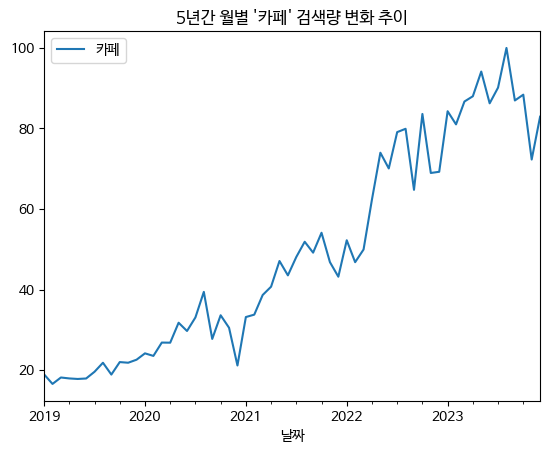

In [27]:
df_datalab_cafe.plot(x='날짜', y='카페', kind='line')
plt.title("5년간 월별 '카페' 검색량 변화 추이")